<a href="https://colab.research.google.com/github/wyllton/phyton/blob/master/SKLEARN%204%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
url = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(url)
dados.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

In [2]:
a_renomear ={
    "mileage_per_year" : "milhagem_por_ano",
    "model_year" : "ano_modelo",
    "price" : "preco",
    "sold" : "vendido",
}
dados = dados.rename(columns = a_renomear)
dados.head()

Unnamed: 0  milhagem_por_ano  ano_modelo      preco vendido
0           0             21801        2000   30941.02     yes
1           1              7843        1998   40557.96     yes
2           2              7109        2006   89627.50      no
3           3             26823        2015   95276.14      no
4           4              7935        2014  117384.68     yes

In [3]:
a_trocar = {
    "no": 0,
    "yes": 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

Unnamed: 0  milhagem_por_ano  ano_modelo      preco  vendido
0           0             21801        2000   30941.02        1
1           1              7843        1998   40557.96        1
2           2              7109        2006   89627.50        0
3           3             26823        2015   95276.14        0
4           4              7935        2014  117384.68        1

In [4]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_modelo
dados.head()

Unnamed: 0  milhagem_por_ano  ...  vendido  idade_do_modelo
0           0             21801  ...        1               20
1           1              7843  ...        1               22
2           2              7109  ...        0               14
3           3             26823  ...        0                5
4           4              7935  ...        1                6

[5 rows x 6 columns]

In [5]:
dados['km_por_ano'] = dados.milhagem_por_ano * 1.60934
dados.head()

Unnamed: 0  milhagem_por_ano  ...  idade_do_modelo   km_por_ano
0           0             21801  ...               20  35085.22134
1           1              7843  ...               22  12622.05362
2           2              7109  ...               14  11440.79806
3           3             26823  ...                5  43167.32682
4           4              7935  ...                6  12770.11290

[5 rows x 7 columns]

In [6]:
dados = dados.drop(columns = ["Unnamed: 0" , "milhagem_por_ano" , "ano_modelo"], axis = 1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               20  35085.22134
1   40557.96        1               22  12622.05362
2   89627.50        0               14  11440.79806
3   95276.14        0                5  43167.32682
4  117384.68        1                6  12770.11290

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np


x = dados[["preco" , "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]



SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x) , len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos 2500 elementos
A acurácia foi de 58.00%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x,treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy_stratified foi de %.2f%%" % acuracia)


A acurácia do dummy_stratified foi de 52.44%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [9]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(treino_x,treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy_mostfrequent foi de %.2f%%" % acuracia)

A acurácia do dummy_mostfrequent foi de 50.68%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)
print("treinaremos com %d e testaremos com %d" % (len(treino_x) , len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acuracia do SVC foi de %.2f%%" % acuracia)


treinaremos com 7500 e testaremos com 2500
A acuracia do SVC foi de 77.48%


In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)
print("treinaremos com %d e testaremos com %d" % (len(treino_x) , len(teste_x)))



modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(raw_treino_x,treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acuracia do SVC foi de %.2f%%" % acuracia)


treinaremos com 7500 e testaremos com 2500
A acuracia do SVC foi de 79.28%


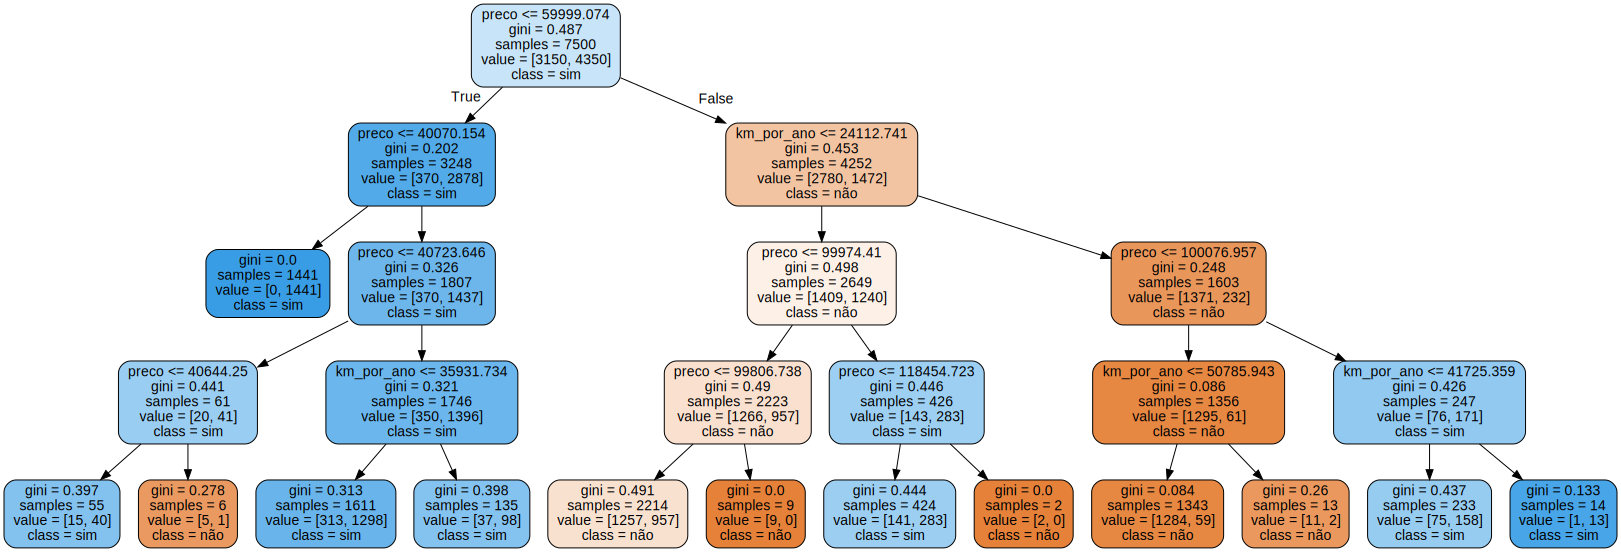

In [33]:
from sklearn.tree import export_graphviz
import graphviz

feature = x.columns
dot_date = export_graphviz(modelo, out_file = None , feature_names = feature , filled = True , rounded = True, class_names=["não", "sim"], )
graphviz.Source(dot_date)